# **Projet data visualization Streamlit**

# **I. Partie 1 : Notebook d’exploration visuelle complète**

In [8]:

#pour lire les fichiers excel
!pip install openpyxl

## Importation librairies 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lecture data

In [4]:

# Paramètres graphiques globaux
sns.set(style="whitegrid")           # style Seaborn avec grille légère
plt.rcParams['figure.figsize'] = (12,6)  # taille par défaut des graphiques

# Chargement du fichier Excel
file_path = "../data/online_retail_II.xlsx"
df_sheets = pd.read_excel(file_path, sheet_name=None)  # lire les feuilles
df = pd.concat(df_sheets.values(),ignore_index=True)   #concatener toutes les valeurs des feuilles

# Aperçu des 5 premières lignes
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df.shape


(525461, 8)

In [12]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [13]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
#Création de la colonne Revenue

df['Revenue'] = df['Quantity'] * df['Price']


## 1. Fiche synthétique des données

In [27]:

# Création de la fiche synthétique sous forme de tableau

fiche_synthetique = pd.DataFrame({
    "Élément": [
        "Source",
        "Période - Date min",
        "Période - Date max",
        "Nombre de lignes",
        "Nombre de colonnes",
        "Clients uniques",
        "Stocks uniques",
        "Pays uniques",
        "Chiffre d'affaires total (£)",
        "Factures uniques"
    ],
    "Valeur": [
        "https://archive.ics.uci.edu/dataset/502/online+retail+ii",
        df['InvoiceDate'].min(),
        df['InvoiceDate'].max(),
        df.shape[0],
        df.shape[1],
        df['Customer ID'].nunique(),
        df['StockCode'].nunique(),
        df['Country'].nunique(),
        round(df['Revenue'].sum(),2),
        df['Invoice'].nunique()
    ]
})

# Affichage
display(fiche_synthetique)


,Élément,Valeur
0,Source,https://archive.ics.uci.edu/dataset/502/online...
1,Période - Date min,2009-12-01 07:45:00
2,Période - Date max,2011-12-09 12:50:00
3,Nombre de lignes,1067371
4,Nombre de colonnes,18
5,Clients uniques,5942
6,Stocks uniques,5305
7,Pays uniques,43
8,Chiffre d'affaires total (£),19286503.43
9,Factures uniques,53628


## 2. Dictionnaire des variables

In [8]:

data_dictionary = pd.DataFrame({
    'Nom': [
        'Invoice', 
        'StockCode', 
        'Description', 
        'Quantity', 
        'InvoiceDate', 
        'Price', 
        'Customer ID', 
        'Country',
        'Revenue'
    ],
    
    'Type': [
        'string',
        'string',
        'string',
        'int',
        'datetime',
        'float',
        'float',
        'string',
        'float'
    ],
    
    'Sémantique': [
        'Numéro unique de la facture (C = annulation)',
        'Code unique du produit',
        'Nom du produit',
        'Quantité achetée (négatif = retour)',
        'Date et heure de la transaction',
        'Prix unitaire du produit',
        'Identifiant unique du client',
        'Pays du client',
        'Chiffre d’affaires de la ligne'
    ],

    'Unités/valeurs': [
        'Chaîne de caractères',
        'Chaîne de caractères',
        'Texte',
        'Entier',
        'Datetime',
        '£ (livres sterling)',
        'Nombre entier / NaN possible',
        'Texte',
        '£ (Quantity × Price)'
    ]
})

styled_dict = (
    data_dictionary.style
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#000000'),
                   ('color', 'white'),
                   ('font-size', '14px'),
                   ('text-align', 'center'),
                   ('border', '1px solid #444')]},
        {'selector': 'td',
         'props': [('border', '1px solid #666'),
                   ('color', '#111'),
                   ('padding', '6px'),
                   ('text-align', 'center')]},
        {'selector': 'tr:nth-child(odd)',
         'props': [('background-color', '#FFFFFF')]},
        {'selector': 'tr:nth-child(even)',
         'props': [('background-color', '#F2F2F2')]}
    ])
    .hide(axis='index')
  .set_table_attributes('style="margin-left:auto; margin-right:auto"')  # <-- centre le tableau
)

styled_dict


Nom,Type,Sémantique,Unités/valeurs
Invoice,string,Numéro unique de la facture (C = annulation),Chaîne de caractères
StockCode,string,Code unique du produit,Chaîne de caractères
Description,string,Nom du produit,Texte
Quantity,int,Quantité achetée (négatif = retour),Entier
InvoiceDate,datetime,Date et heure de la transaction,Datetime
Price,float,Prix unitaire du produit,£ (livres sterling)
Customer ID,float,Identifiant unique du client,Nombre entier / NaN possible
Country,string,Pays du client,Texte
Revenue,float,Chiffre d’affaires de la ligne,£ (Quantity × Price)


## 3. Qualité des données

### Valeurs manquantes

In [9]:
# Nombre et pourcentage de valeurs manquantes
missing_summary = pd.DataFrame({
    'Nombre de valeurs nulles': df.isnull().sum(),
    'Pourcentage (%)': df.isnull().mean()*100
}).sort_values(by='Pourcentage (%)', ascending=False)

missing_summary

,Nombre de valeurs nulles,Pourcentage (%)
Customer ID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
Quantity,0,0.000000
StockCode,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000
Revenue,0,0.000000


### Doublons

In [10]:

# Création d'un tableau des doublons
duplicates_table = pd.DataFrame({
    'Nombre de doublons': df.apply(lambda x: x.duplicated().sum())
})

# Trier par nombre de doublons décroissant pour plus de lisibilité
duplicates_table = duplicates_table.sort_values(by='Nombre de doublons', ascending=False)

# Affichage
duplicates_table


,Nombre de doublons
Country,1067328
Quantity,1066314
Price,1064564
StockCode,1062066
Description,1061672
Customer ID,1061428
Revenue,1059742
InvoiceDate,1019736
Invoice,1013743


### Outliers

#### Outliers Quantité

In [11]:
# OUTLIERS QUANTITE
Q1 = df["Quantity"].quantile(0.25)  # 1er quartile
Q3 = df["Quantity"].quantile(0.75)  # 3e quartile
IQR = Q3 - Q1                        # Intervalle interquartile

# Bornes
lower_bound_q = Q1 - 1.5 * IQR
upper_bound_q = Q3 + 1.5 * IQR

# Filtrage des outliers
df["is_outlier_quantity"] = (df["Quantity"] < lower_bound_q) | (df["Quantity"] > upper_bound_q)

# Nombre d’outliers détectés
print("Nombre de quantity outliers :", df["is_outlier_quantity"].sum())


Nombre de quantity outliers : 116489


#### Outliers Prix

In [12]:
# OUTLIERS PRIX
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Bornes
lower_bound_p = Q1 - 1.5 * IQR
upper_bound_p = Q3 + 1.5 * IQR

# Filtrage des outliers
df["is_outlier_price"] = (df["Price"] < lower_bound_p) | (df["Price"] > upper_bound_p)

# Nombre d’outliers détectés
print("Nombre de prix outliers :", df["is_outlier_price"].sum())


Nombre de prix outliers : 68105


In [13]:
print(lower_bound_q)
print(upper_bound_q)
print(lower_bound_p)
print(upper_bound_p)

-12.5
23.5
-3.1000000000000005
8.5


## Annulations de commandes

In [38]:
# Identifier les factures annulées
df['Annulation'] = df['Invoice'].astype(str).str.startswith('C')

# Ajuster le revenu pour les annulations (Revenue négatif)
df.loc[df['Annulation'], 'Revenue'] *= -1

# Vérifications
print(f"Nombre de factures annulées : {df['Annulation'].sum()}")
print(f"CA total ajusté (inclut les annulations) : {df['Revenue'].sum():,.2f} £")

# Créer un dataset pour analyses clients (ventes uniquement, sans annulations)
df_clients = df[~df['Annulation']].copy()
print(f"Nombre de lignes pour analyses clients : {len(df_clients)}")

  

Nombre de factures annulées : 19494
CA total ajusté (inclut les annulations) : 22,341,333.43 £
Nombre de lignes pour analyses clients : 1047877


In [26]:
# Retours sans annulation
df_clients['is_return'] = df_clients['Quantity'] < 0

# Produits endommagés (quantité négative, prix = 0)
df_clients['is_damage'] = (df_clients['Quantity'] < 0) & (df_clients['Price'] == 0)


## Granularité temporelle 

### Minute / Heure

In [19]:
# Extraire l'heure et la minute de la transaction
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute

# Nombre de transactions par heure
transactions_per_hour = df.groupby('Hour')['Invoice'].nunique()

# Affichage
print("Transactions par heure :")
print(transactions_per_hour)


Transactions par heure :
Hour
6       22
7      110
8     1150
9     3520
10    6030
11    6628
12    8098
13    7163
14    6519
15    6168
16    4167
17    2544
18     826
19     581
20     102
21       1
Name: Invoice, dtype: int64


### Jour

In [20]:
df['Day'] = df['InvoiceDate'].dt.date  # extrait la date

# Nombre de transactions par jour
transactions_per_day = df.groupby('Day')['Invoice'].nunique()

transactions_per_day.head()


Day
2009-12-01    166
2009-12-02    133
2009-12-03    150
2009-12-04    107
2009-12-05     32
Name: Invoice, dtype: int64

### Semaine

In [21]:
df['Week'] = df['InvoiceDate'].dt.to_period('W')  # période hebdomadaire

# Nombre de transactions par semaine
transactions_per_week = df.groupby('Week')['Invoice'].nunique()

transactions_per_week.head()


Week
2009-11-30/2009-12-06    678
2009-12-07/2009-12-13    728
2009-12-14/2009-12-20    637
2009-12-21/2009-12-27    287
2010-01-04/2010-01-10    303
Freq: W-SUN, Name: Invoice, dtype: int64

### Mois


In [22]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # période mensuelle

# Nombre de transactions par mois
transactions_per_month = df.groupby('Month')['Invoice'].nunique()

transactions_per_month


Month
2009-12    2330
2010-01    1633
2010-02    1969
2010-03    2367
2010-04    1892
2010-05    2418
2010-06    2216
2010-07    2017
2010-08    1877
2010-09    2375
2010-10    2965
2010-11    3669
2010-12    2025
2011-01    1476
2011-02    1393
2011-03    1983
2011-04    1744
2011-05    2162
2011-06    2012
2011-07    1927
2011-08    1737
2011-09    2327
2011-10    2637
2011-11    3462
2011-12    1015
Freq: M, Name: Invoice, dtype: int64

### Année

In [23]:
df['Year'] = df['InvoiceDate'].dt.year

# Nombre de transactions par année
transactions_per_year = df.groupby('Year')['Invoice'].nunique()

transactions_per_year


Year
2009     2330
2010    27423
2011    23875
Name: Invoice, dtype: int64

#### Agrégation par jour , mois , année : nombre de transactions

In [24]:
# Agrégation par jour
df['Day'] = df['InvoiceDate'].dt.to_period('D')  # convertir en jour
daily_transactions = df.groupby('Day')['Invoice'].nunique().reset_index()
daily_transactions.rename(columns={'Invoice': 'Nombre de transactions'}, inplace=True)

# Agrégation par mois
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # convertir en mois
monthly_transactions = df.groupby('Month')['Invoice'].nunique().reset_index()
monthly_transactions.rename(columns={'Invoice': 'Nombre de transactions'}, inplace=True)

# Agrégation par année
df['Year'] = df['InvoiceDate'].dt.to_period('Y')  # convertir en année
yearly_transactions = df.groupby('Year')['Invoice'].nunique().reset_index()
yearly_transactions.rename(columns={'Invoice': 'Nombre de transactions'}, inplace=True)

# Affichage des tableaux
print("Transactions par jour :")
display(daily_transactions.head())
print("\nTransactions par mois :")
display(monthly_transactions.head())
print("\nTransactions par année :")
display(yearly_transactions.head())

Transactions par jour :


,Day,Nombre de transactions
0,2009-12-01,166
1,2009-12-02,133
2,2009-12-03,150
3,2009-12-04,107
4,2009-12-05,32



Transactions par mois :


,Month,Nombre de transactions
0,2009-12,2330
1,2010-01,1633
2,2010-02,1969
3,2010-03,2367
4,2010-04,1892



Transactions par année :


,Year,Nombre de transactions
0,2009,2330
1,2010,27423
2,2011,23875


In [36]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month_Num'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Day'] = df['InvoiceDate'].dt.day


## Visualisation

### Distribution du montant des achats a l'échelle logarithmique

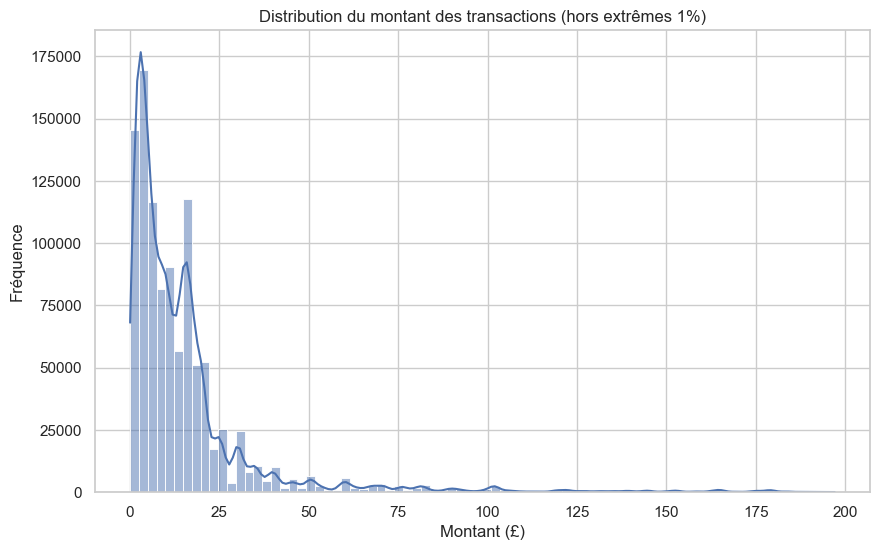

In [39]:
#DISTRIBUTION DU MONTANT DES ACHATS (sans les extrêmes 1%)
amount_pos = df[df['Revenue'] > 0]['Revenue']
threshold = amount_pos.quantile(0.99)

plt.figure(figsize=(10,6))
sns.histplot(amount_pos[amount_pos <= threshold], bins=80, kde=True)
plt.title("Distribution du montant des transactions (hors extrêmes 1%)")
plt.xlabel("Montant (£)")
plt.ylabel("Fréquence")
plt.show()

Ce graphique montre la distribution du montant des transactions en utilisant les valeurs réelles, sans transformation logarithmique. Il permet d’observer la répartition des achats selon leur montant et de repérer les niveaux de prix les plus courants.
L’axe X représente le montant de la transaction (en £).
L’axe Y représente le nombre de transactions appartenant à chaque intervalle de montants (fréquence).

La distribution montre que la majorité des transactions concernent de petits montants, ce qui est typique d’un modèle commercial orienté B2C. En décidant de ne pas afficher les valeurs extrêmes (filtrage des 1% ou 5% les plus élevés), la forme de la distribution devient plus lisible et permet d’identifier clairement les montants les plus fréquents.
Les montants élevés sont beaucoup plus rares, mais ils peuvent représenter une part significative du chiffre d’affaires global, généralement associés à des commandes plus volumineuses, potentiellement B2B.

### Graphique du nombre de transactions par mois 

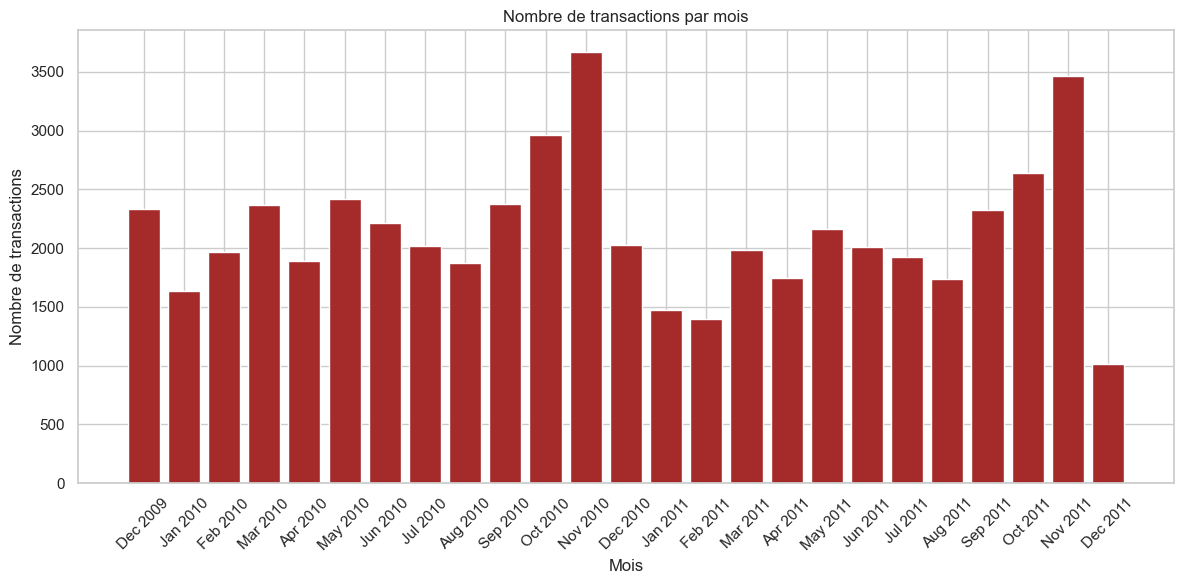

In [40]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Créer une colonne 'Month' pour l'agrégation
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # type Period

# Agréger par mois : nombre de transactions uniques
monthly_transactions = df.groupby('Month')['Invoice'].nunique()

# Convertir l'index Period en datetime pour plot
monthly_transactions.index = monthly_transactions.index.to_timestamp()

# Créer des labels lisibles : mois abrégé + année
month_labels = monthly_transactions.index.strftime('%b %Y')  # ex: Dec 2009, Jan 2010

# Plot
plt.figure(figsize=(12,6))
plt.bar(month_labels, monthly_transactions.values, color='brown')
plt.title("Nombre de transactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Pays par CA 

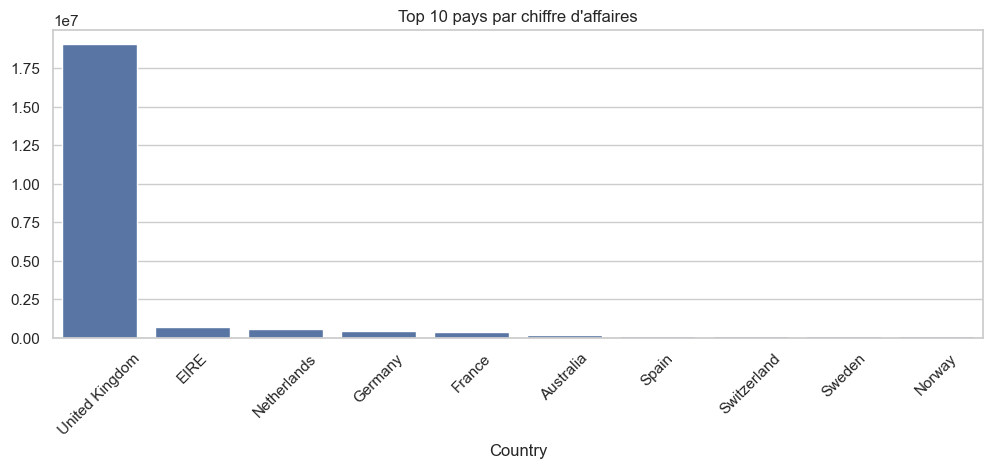

In [42]:
top_countries = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,4))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 pays par chiffre d'affaires")
plt.xticks(rotation=45)
plt.show()

### Évolution du chiffre d'affaires mensuel

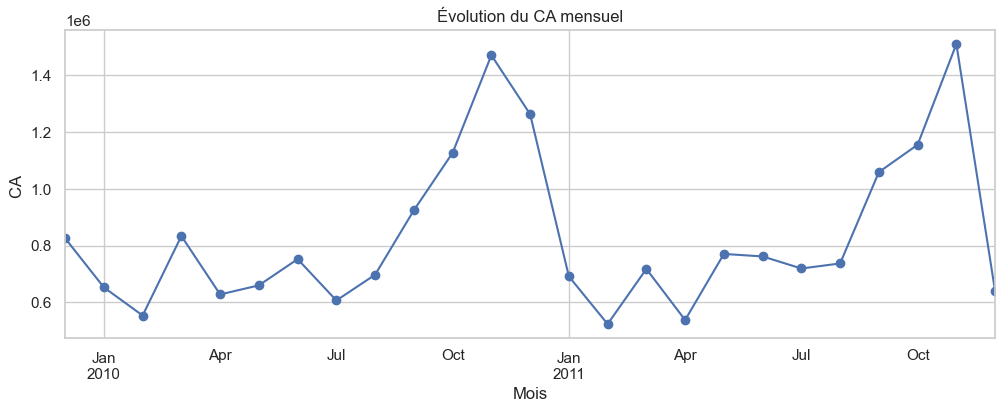

In [43]:
df_sales = df[df["Quantity"] > 0].copy()
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

plt.figure(figsize=(12,4))
df_sales.groupby("InvoiceMonth")["Revenue"].sum().plot(marker="o")
plt.title("Évolution du CA mensuel")
plt.xlabel("Mois")
plt.ylabel("CA ") #devise = euro?
plt.grid(True)
plt.show()

### Chiffre d'affaires par jour de semaine

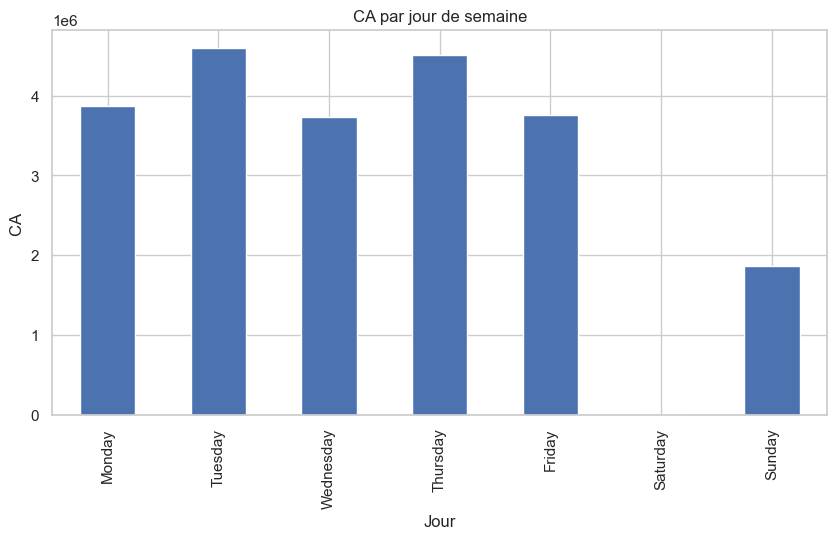

In [44]:

#SAISONNALITE JOURNALIERE (utile ou pas)

df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
order_dow = df.groupby("DayOfWeek")["Revenue"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.figure(figsize=(10,5))
order_dow.plot(kind="bar")
plt.title("CA par jour de semaine")
plt.ylabel("CA ")
plt.xlabel("Jour")
plt.show()


### Mix Grossiste / Détaillant

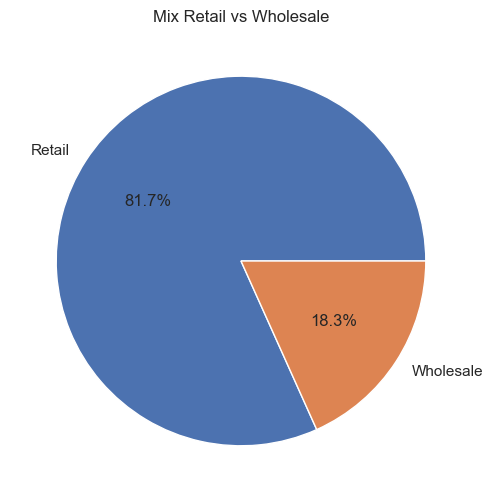

In [45]:
#MIX GROSSISTE/DETAILLANT

df["IsWholesale"] = df["Customer ID"].isna() | (df["Quantity"] > 1000)
mix = df.groupby("IsWholesale")["Revenue"].sum()
mix.index = ["Retail","Wholesale"]
plt.figure(figsize=(6,6))
mix.plot(kind="pie", autopct="%1.1f%%")
plt.title("Mix Retail vs Wholesale")         
plt.ylabel("")
plt.show()

### Premier apercu des cohortes

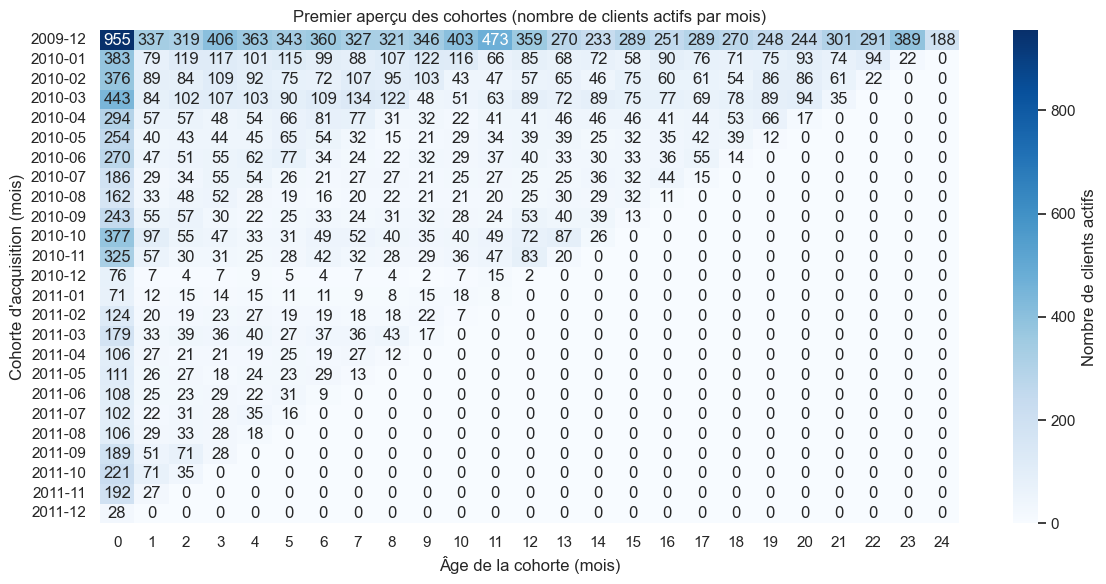

In [50]:
# Ventes réelles (positives)
df_sales = df[df["Quantity"] > 0].copy()

# Cohorte = mois de première commande par client
df_sales["CohortMonth"] = df_sales.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")

#  Mois de la transaction
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

#  Age de la cohorte (en mois)
df_sales["CohortAge"] = ((df_sales["InvoiceMonth"].dt.year - df_sales["CohortMonth"].dt.year)*12 + (df_sales["InvoiceMonth"].dt.month - df_sales["CohortMonth"].dt.month))

#  Tableau des clients actifs par cohorte et âge
cohort_counts = df_sales.groupby(["CohortMonth", "CohortAge"])["Customer ID"].nunique().unstack(fill_value=0)

#  Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cohort_counts, cmap="Blues", annot=True, fmt="d", cbar_kws={'label': 'Nombre de clients actifs'})
plt.title("Premier aperçu des cohortes (nombre de clients actifs par mois)")
plt.ylabel("Cohorte d'acquisition (mois)")
plt.xlabel("Âge de la cohorte (mois)")
plt.tight_layout()
plt.show()

Lignes(CohortMonth): le mois de la première commande; 
Colonnes(CohortAge): l'âge des cohortes en mois;
Exemple: (2011-06,3) indique le nombre de clients ayant effectué une commande 3 mois apès leur première commande

### Premier profil RFM

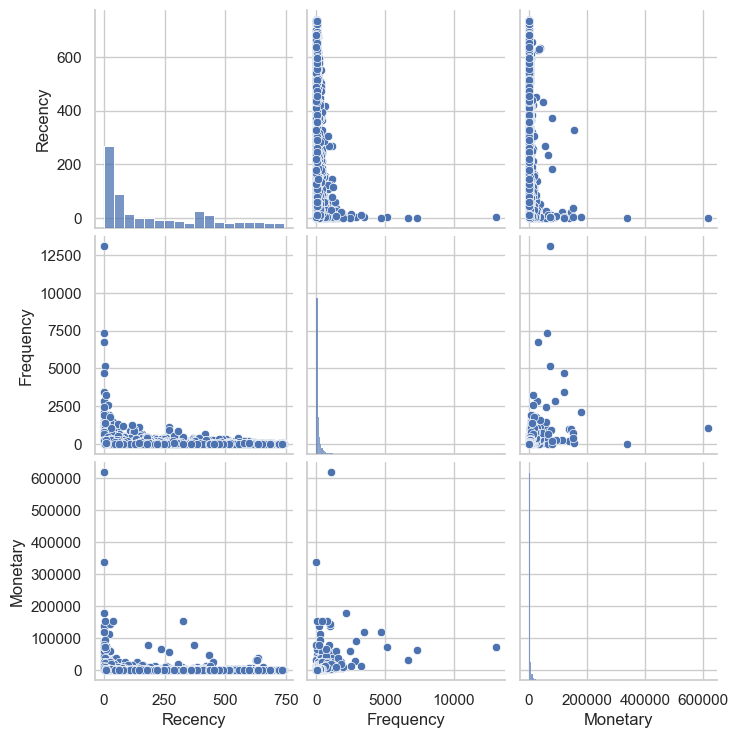

In [48]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)  # lendemain de la dernière transaction

# Calcul RFM
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice": "count",
    "Revenue": "sum"
})
rfm.columns = ["Recency","Frequency","Monetary"]

# Pairplot sur un échantillon
n_clients = len(rfm)
sns.pairplot(rfm.sample(n=min(5000, n_clients), random_state=42))
plt.show()



### Heatmap du Chiffre d'affaires mensuel de chaque produit 

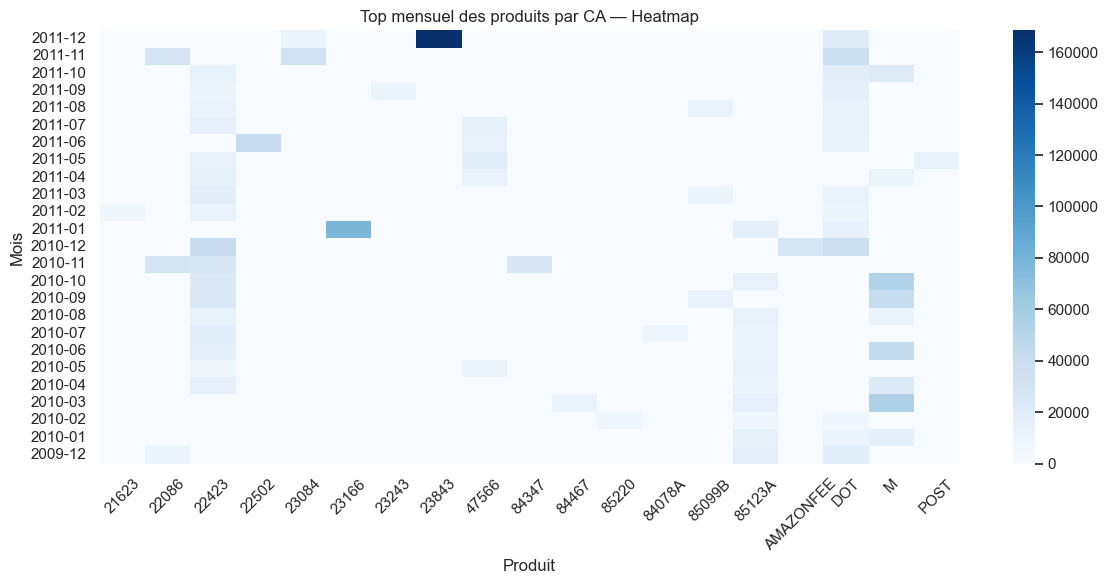

In [49]:
#Heatmap du Chiffre d'affaires mensuel de chaque produit 
df_sales = df[df["Quantity"] > 0].copy()
df_sales["InvoiceMonth"] = df_sales["InvoiceDate"].dt.to_period("M")

df_top = (
    df_sales.groupby(["InvoiceMonth","StockCode"])["Revenue"]
      .sum()
      .reset_index()
)

df_top = (
    df_top.sort_values(["InvoiceMonth","Revenue"], ascending=[True,False])
          .groupby("InvoiceMonth")
          .head(3)
)

pivot = df_top.pivot_table(
    index="InvoiceMonth",
    columns="StockCode",
    values="Revenue",
    fill_value=0
).sort_index(ascending=False)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Top mensuel des produits par CA — Heatmap")
plt.xlabel("Produit")
plt.ylabel("Mois")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
#df.to_csv("data/processed/retail_clean_full.csv", index=False)
#df_clients.to_csv("data/processed/retail_clean_clients.csv", index=False)
#print("\nFichiers exportés dans data/processed/")


##  Questions d'analyses pour mieux pour cadrer notre application

Dans cette section , nous allons identifier les questions analytiques essentielles que l’application Streamlit devra adresser.
L’objectif est de guider la suite des analyses et d’orienter la conception des visualisations et des métriques clés.

### 1) Première question : Quelles cohortes montrent la plus forte décroissance de clients dans le temps ?

Pourquoi : Identifier les cohortes où les clients arrêtent d’acheter rapidement permet de cibler les actions de fidélisation.

Métriques : taux de rétention par âge de cohorte (M+1, M+2, M+3…), nombre de clients actifs par cohorte.

Visuels : heatmap de rétention par cohorte et âge, courbe de survie des clients.

Chaque couleur de la heatmap représente le nombre de clients actifs à chaque mois d’âge de 
cohorte. Les zones plus claires montrent les cohortes qui décrochent plus vite.

### 2) Question 2 : Quels segments RFM sont à forte valeur ?

Pourquoi : Prioriser les efforts marketing sur les clients qui génèrent le plus de revenu.

Métriques :
Recency (R) : nombre de jours depuis le dernier achat;
Frequency (F) : nombre total d’achats;
Monetary (M) : montant total dépensé;

Visuels : scatter plot RFM, bar chart par segment

Chaque segment montre sa valeur et sa fidélité ; les segments “Champions” ou “Loyaux” ont une R faible, F et M élevées.

### 3) Question 3 : Quel est l’impact des retours (factures annulées) sur le CA et la marge ?

Pourquoi : Les retours réduisent le CA réel et la marge, et influencent directement la CLV(Customer Lifetime Value).

Métriques :
montant total retourné; 
% de retours par client ou produit; 
marge nette après retours

Visuels : histogramme des montants retournés, KPI comparant CA brut vs net 

Les visuels permettent de détecter quels clients ou produits génèrent le plus de retours et l’impact sur le chiffre d’affaires.

Cela permet d’évaluer si les politiques de retour doivent être ajustées ou si certaines catégories de clients nécessitent une attention particulière.

### 4) Question 4 : Le revenu est-il tiré par les nouveaux clients ou les clients récurrents ?

Pourquoi : Permet d’analyser si l’entreprise dépend plus de l’acquisition ou de la fidélisation.

Métriques : CA des nouveaux clients vs CA des clients récurrents, proportion relative du total.

Visuels : stacked area chart mensuel

Cela montre la contribution relative des nouveaux vs anciens clients sur le revenu total.

Cela permet d’analyser si l’entreprise doit concentrer ses efforts et son budget sur l’acquisition de nouveaux clients ou sur la fidélisation des clients existants.

### 5) Question 5 : Quelles cohortes sont les plus rentables (CLV) ?

Pourquoi : Identifier les cohortes les plus lucratives pour orienter le budget acquisition et la stratégie CRM.

Métriques : CLV par cohorte (valeur client cumulée, marge nette), nombre de clients.

Visuels : bar chart CLV par cohorte, tableau comparatif.

Visualiser quelles cohortes apportent le plus de valeur dans le temps.

Cela permet de déterminer quelles cohortes génèrent le plus de valeur sur le long terme, afin d’orienter les efforts et les investissements en acquisition ou fidélisation.


### 6) Question 6:  Quel scénario (+5% rétention, −10% marge, etc.) impacte le plus le CA et la CLV ?

Pourquoi : Tester des scénarios business pour guider les décisions marketing et CRM.

Métriques : CLV simulée avec différents paramètres de rétention ou de marge, CA projeté, taux de rétention projeté.

Visuels : graphique comparatif avant/après scénario, tableau de simulation.

Permet de visualiser l’impact potentiel de modifications de stratégie sur les revenus et la fidélité.

### 7) Question 7 : Quels produits génèrent le plus de chiffre d’affaires et de marge ?

À quoi ça sert : Identifier les produits les plus rentables pour l’entreprise et comprendre l’impact des ventes sur le chiffre d’affaires total.

Pourquoi c’est utile : Pour prioriser les promotions, la gestion des stocks, et détecter les produits qui contribuent le plus à la rentabilité.
Métriques :
Chiffre d’affaires par produit
Marge par produit
Nombre de ventes / quantité vendue

Visuels : bar chart top 10 produits par CA ou marge, heatmap mensuelle des best-sellers

Les produits avec le CA ou la marge la plus élevée sont stratégiques pour le business, et ceux avec beaucoup de retours peuvent réduire leur valeur réelle.